In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 4.7MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.8-cp36-none-any.whl size=73275 sha256=d9bda79bfbb4ef032d4ea992f618f59ba465e49c7ed444ef5f268bce1a1911eb
  Stored in directory: /root/.cache/pip/wheels/94/a7/09/68dc83c7c14fdbdf5d3f2b2da5b87e587bfc1e85df69b1130c
Successfully built kaggle
  Found existing installation: kaggle 1.5.8
    Uninstalling kaggle-1.5.8:
      Successfully uninstalled kaggle-1.5.8


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"raunitsingh","key":"03a6707e92aa532fff0f9d431df93094"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d ikarus777/best-artworks-of-all-time

 99% 2.27G/2.29G [00:52<00:00, 48.4MB/s]
100% 2.29G/2.29G [00:52<00:00, 46.7MB/s]


In [ ]:
! mkdir train

In [ ]:
! unzip -q best-artworks-of-all-time.zip -d train

In [ ]:
! rm best-artworks-of-all-time.zip

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

plt.style.use('seaborn')

In [ ]:
df = pd.read_csv("/content/train/artists.csv")

In [ ]:
df.drop(['bio', 'wikipedia', 'id'], axis=1, inplace=True)
df.head()

,name,years,genre,nationality,paintings
0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,193
1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,88
2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,70
3,Claude Monet,1840 - 1926,Impressionism,French,73
4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,194


In [ ]:
df_year = pd.DataFrame(df.years.str.split().tolist(), columns = ['birth','-','death'])
df_year.head()

,birth,-,death
0,1884,-,1920
1,1866,-,1944
2,1886,-,1957
3,1840,-,1926
4,1898,-,1967


In [ ]:
df_year.drop('-', axis=1, inplace=True)

In [ ]:
df["birth"] = df_year['birth']
df["death"] = df_year['death']
df.drop(["years"], axis=1, inplace=True)

In [ ]:
df.head()

,name,genre,nationality,paintings,birth,death
0,Amedeo Modigliani,Expressionism,Italian,193,1884,1920
1,Vasiliy Kandinskiy,"Expressionism,Abstractionism",Russian,88,1866,1944
2,Diego Rivera,"Social Realism,Muralism",Mexican,70,1886,1957
3,Claude Monet,Impressionism,French,73,1840,1926
4,Rene Magritte,"Surrealism,Impressionism",Belgian,194,1898,1967


In [ ]:
df.describe()

,paintings
count,50.000000
mean,168.920000
std,157.451105
min,24.000000
25%,81.000000
50%,123.000000
75%,191.750000
max,877.000000


In [ ]:
df["birth"] = df["birth"].apply(lambda x: int(x))
df["death"] = df["death"].apply(lambda x: int(x))

In [ ]:
df["age"] = df.death - df.birth
df.head()

,name,genre,nationality,paintings,birth,death,age
0,Amedeo Modigliani,Expressionism,Italian,193,1884,1920,36
1,Vasiliy Kandinskiy,"Expressionism,Abstractionism",Russian,88,1866,1944,78
2,Diego Rivera,"Social Realism,Muralism",Mexican,70,1886,1957,71
3,Claude Monet,Impressionism,French,73,1840,1926,86
4,Rene Magritte,"Surrealism,Impressionism",Belgian,194,1898,1967,69


In [ ]:
df['age'] = df['age']
bins=[30, 55, 65, 77, 98]
labels=["young adult", "early adult", "adult", "senior"]
df['age_group'] = pd.cut(df['age'], bins,labels=labels)

In [ ]:
df.head()

,name,genre,nationality,paintings,birth,death,age,age_group
0,Amedeo Modigliani,Expressionism,Italian,193,1884,1920,36,young adult
1,Vasiliy Kandinskiy,"Expressionism,Abstractionism",Russian,88,1866,1944,78,senior
2,Diego Rivera,"Social Realism,Muralism",Mexican,70,1886,1957,71,adult
3,Claude Monet,Impressionism,French,73,1840,1926,86,senior
4,Rene Magritte,"Surrealism,Impressionism",Belgian,194,1898,1967,69,adult


No handles with labels found to put in legend.


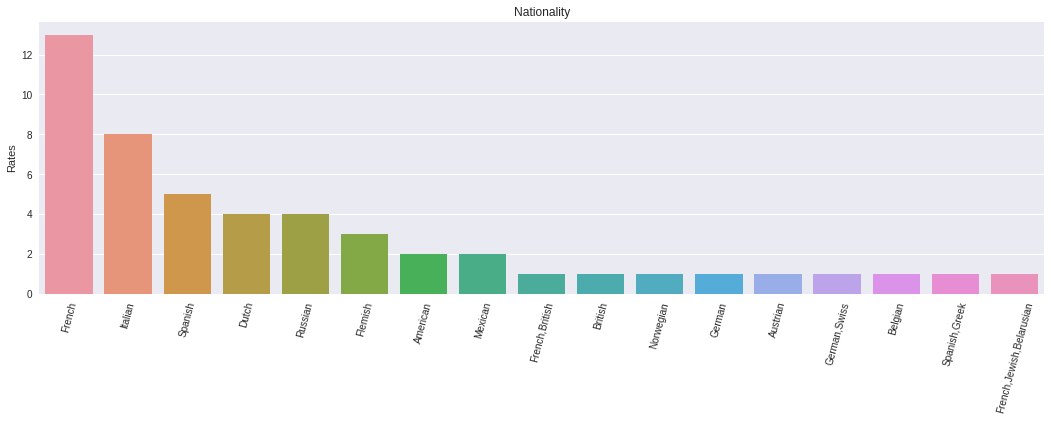

In [ ]:
plt.figure(figsize=(18,5))

sns.barplot(x=df['nationality'].value_counts().index,y=df['nationality'].value_counts().values)
plt.title('Nationality')
plt.xticks(rotation=75)
plt.ylabel('Rates')
plt.legend(loc=0)
plt.savefig('nationality.png')
plt.show()

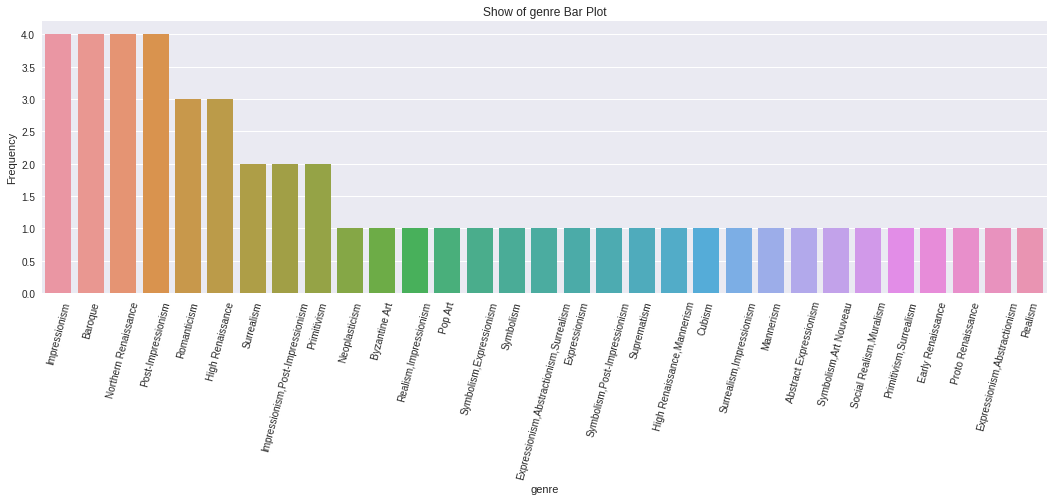

In [ ]:
plt.figure(figsize=(18,5))
sns.barplot(x=df['genre'].value_counts().index, 
            y=df['genre'].value_counts().values)
plt.xlabel('genre')
plt.xticks(rotation=75)
plt.ylabel('Frequency')
plt.title('Show of genre Bar Plot')
plt.savefig('genre.png')
plt.show()

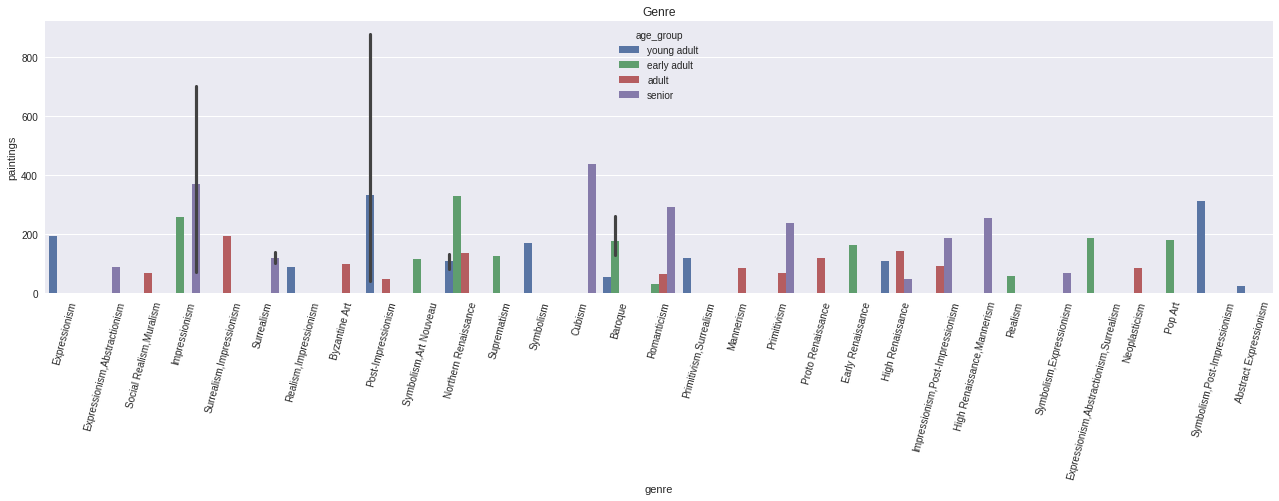

In [ ]:
plt.figure(figsize=(22, 5))
sns.barplot(x="genre", y="paintings", hue="age_group", data=df)
plt.xticks(rotation=75)
plt.title('Genre')
plt.savefig('genre_with_paintings.png')
plt.show()

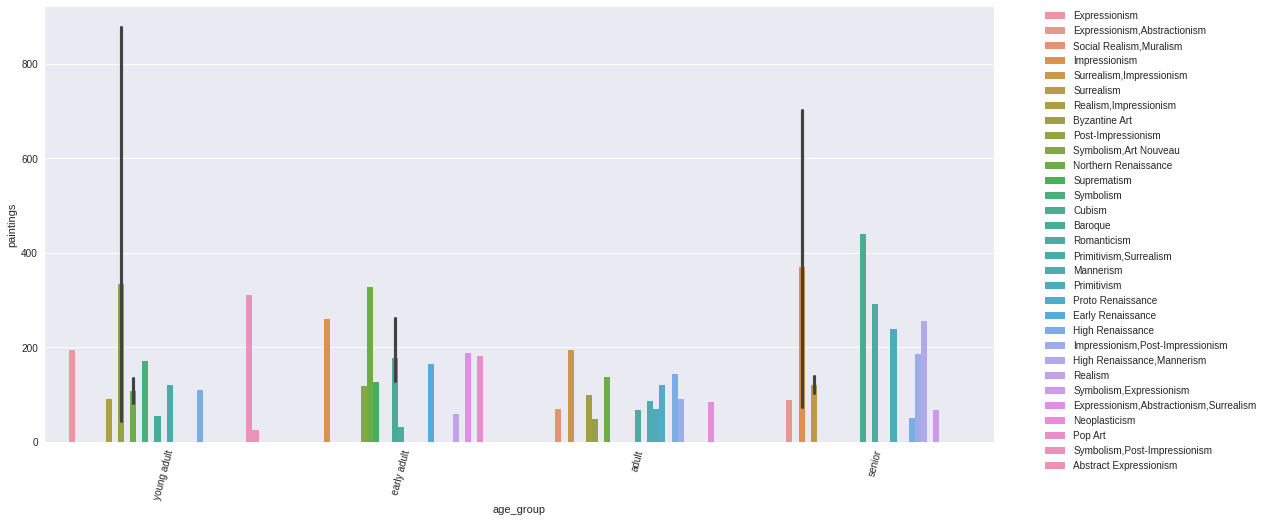

In [ ]:
plt.figure(figsize=(17,8))
sns.barplot(x = "age_group", y = "paintings", hue = "genre", data = df)
plt.xticks(rotation=75)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig('genre_with_age.png')
plt.show()

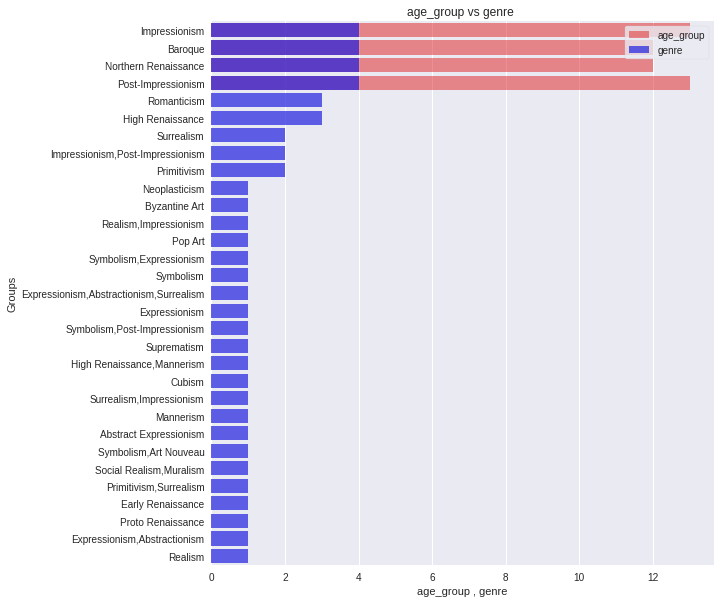

In [ ]:
f,ax=plt.subplots(figsize=(9,10))
sns.barplot(x=df['age_group'].value_counts().values,y=df['age_group'].value_counts().index,alpha=0.5,color='red',label='age_group')
sns.barplot(x=df['genre'].value_counts().values,y=df['genre'].value_counts().index,color='blue',alpha=0.7,label='genre')
ax.legend(loc='upper right',frameon=True)
ax.set(xlabel='age_group , genre',ylabel='Groups',title="age_group vs genre ")
plt.show()

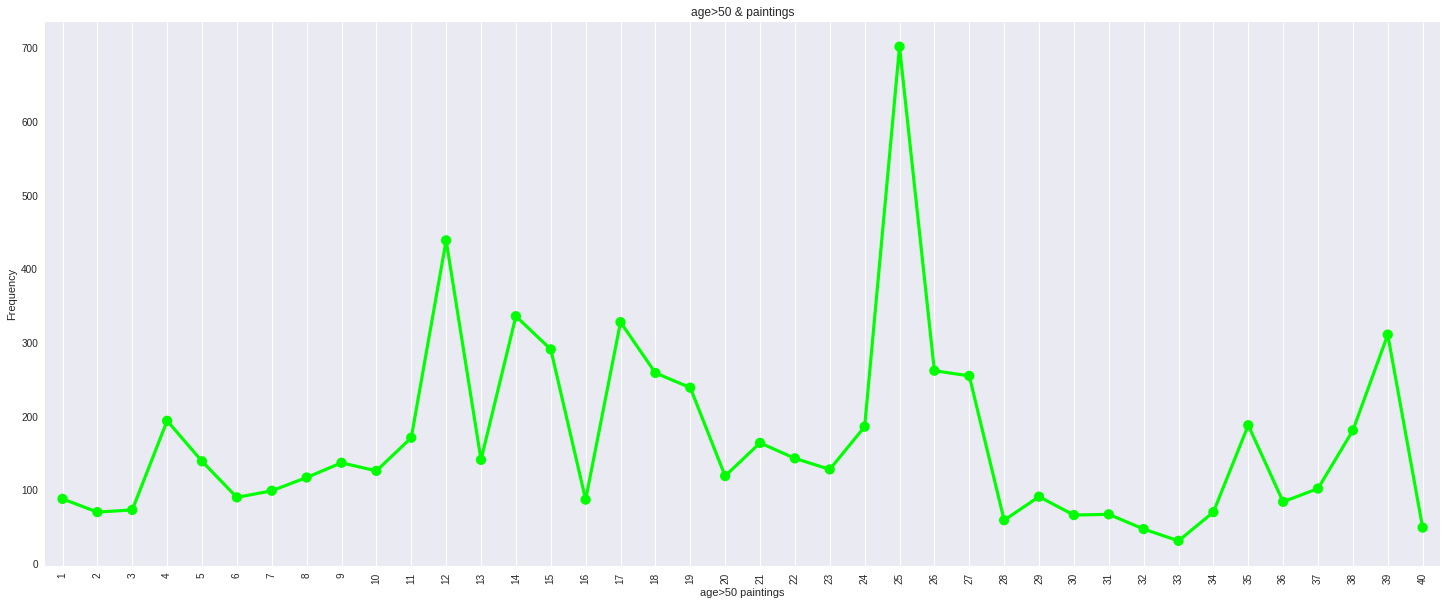

In [ ]:
df['age'].unique()
len(df[(df['age'] > 50)].paintings)
f,ax1=plt.subplots(figsize=(25,10))
sns.pointplot(x=np.arange(1,41),y=df[(df['age']>50)].paintings,color='lime',alpha=0.8)

plt.xlabel('age>50 paintings')
plt.ylabel('Frequency')
plt.title('age>50 & paintings')
plt.xticks(rotation=90)
plt.grid()
plt.show()

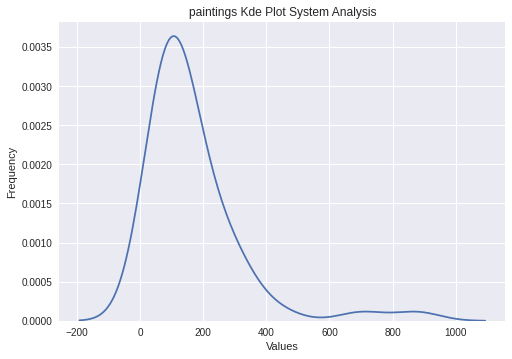

<Figure size 576x396 with 0 Axes>

In [ ]:
sns.kdeplot(df['paintings'])
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('paintings Kde Plot System Analysis')
plt.savefig('save_fig_kde.png')
plt.show()
# plt.savefig('save_fig_kde.png')

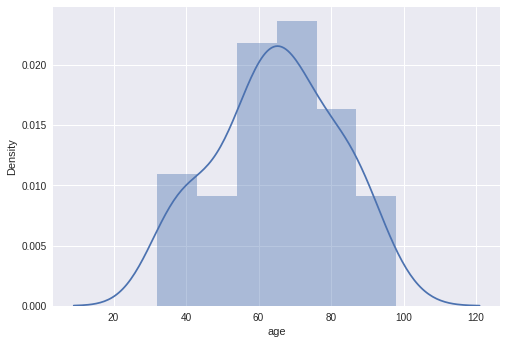

In [ ]:
ax = sns.distplot(df['age'])
plt.savefig('age_kde.png')
plt.show()
# plt.savefig('age_kde.png')

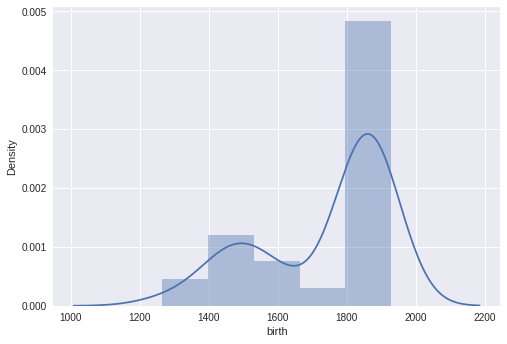

<Figure size 576x396 with 0 Axes>

In [ ]:
ax = sns.distplot(df['birth'])
plt.show()
plt.savefig('birth_kde.png')

In [10]:
from keras.utils import np_utils
from keras.preprocessing.image import array_to_img, img_to_array, load_img
import numpy as np


def convert_filenames_to_image_arrays(files):
  w, h = 256, 256
  images_as_array=[]
  for file in files:
    # print(file)
    # print(file)
    img = load_img(file)
    img = img.resize((w, h))
    img = img_to_array(img)
    img = img / 255.
    images_as_array.append(img)
  return np.array(images_as_array)

In [6]:
from sklearn.datasets import load_files

def load_dataset(path):
  data = load_files(path))
  files = np.array(data['filenames'])
  targets = np.array(data['target'])
  target_labels = np.array(data['target_names'])
  return files, targets, target_labels

x_train, _, target_labels = load_dataset('/content/train/images/images')
print('Loading complete.')

['/content/train/images/images/Albrecht_DuтХа├кrer/Albrecht_DuтХа├кrer_31.jpg'
 '/content/train/images/images/Amedeo_Modigliani/Amedeo_Modigliani_21.jpg'
 '/content/train/images/images/Gustave_Courbet/Gustave_Courbet_11.jpg' ...
 '/content/train/images/images/Mikhail_Vrubel/Mikhail_Vrubel_26.jpg'
 '/content/train/images/images/Giotto_di_Bondone/Giotto_di_Bondone_17.jpg'
 '/content/train/images/images/El_Greco/El_Greco_71.jpg']
Loading complete.


'/content/train/images/images/Albrecht_DuтХа├кrer/Albrecht_DuтХа├кrer_31.jpg'

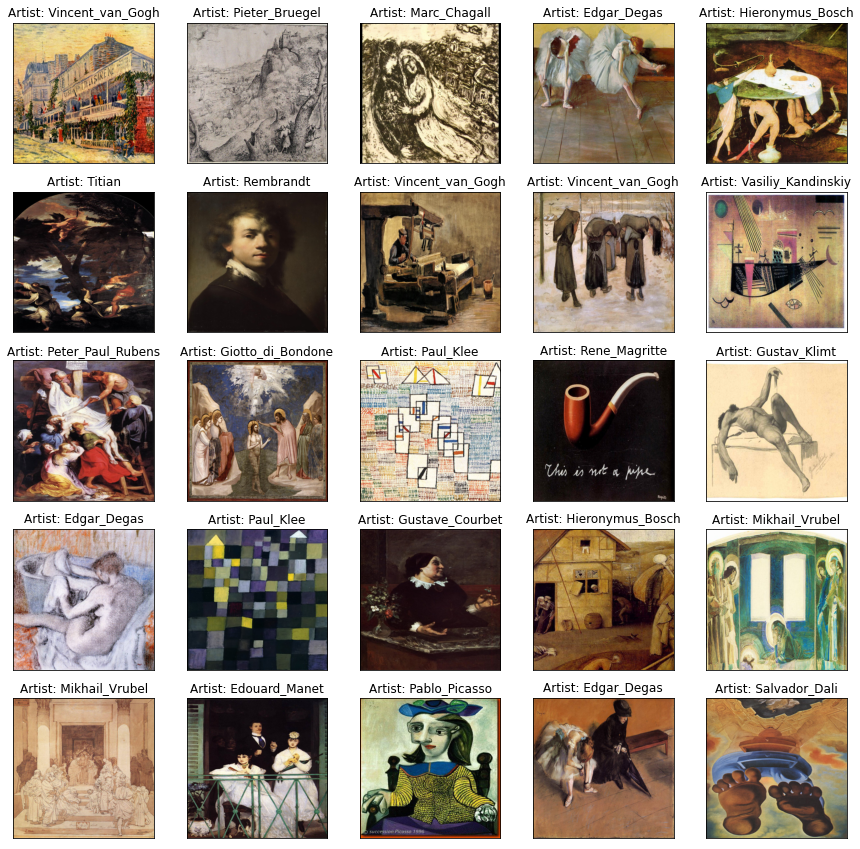

In [14]:
import matplotlib.pyplot as plt
indices = [np.random.randint(0, x_train.shape[0]) for i in range(25)]
random_files = [x_train[val] for val in indices]
labels = [target_labels[_[val]] for val in indices]
images = convert_filenames_to_image_arrays(random_files)
plt.figure(figsize=(15, 15))
images = convert_filenames_to_image_arrays(random_files)
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.title(f'Artist: {labels[i]}')
  plt.imshow(images[i]);
plt.savefig('Artworks.png')